# Introduction to Descriptive Statistics

One of the most basic tasks in data analytics  is describing a body of data by a small number of statistical measurements and visualizations. It helps us to summarize and interprete the raw data, especially when we are dealing with large datasets. 

Depending on the type of data we have, it exists different summary measurements. Usually we start by looking at every single variable of our dataset. Then we try to find out if any statistical relationships exist between our dataset features. So understanding the different data types, is a crucial prerequisite for doing summary statistics and statistics in general. 

## Types of Data

Before we can start with descriptive statistics and exploratory data analysis, let us first get to know the different types of data and how to measure them. In fact, how the measurement is carried out depends on the type of variable involved in the analysis. Different types are measured differently.

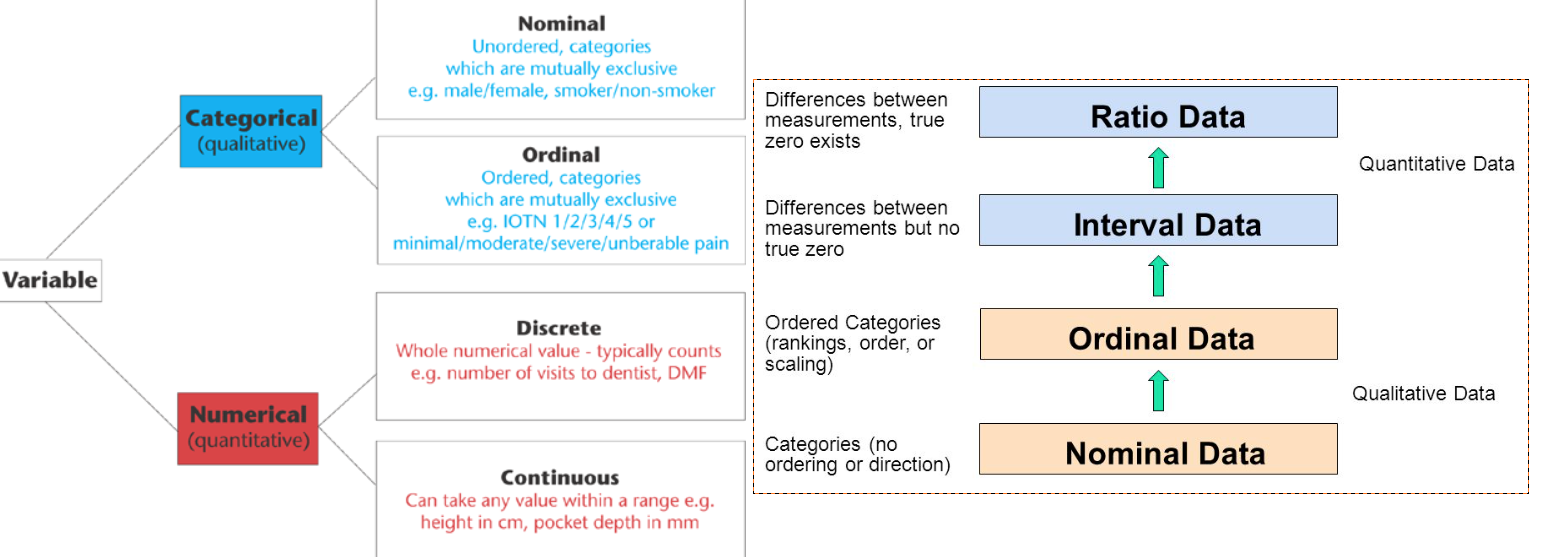
[Source](https://www.graphpad.com/support/faqid/1089/)

Descriptive statistics for a single numerical variable:

* Measures of central tendency
* Measures of variability  (Dispersion)
* Shape and distribution




### Categorical Variables

Categorical variables can be nominal or ordinal.  Nominal data has no intrinsic ordering to the categories. Ordinal data has a clear ordering such as low, medium and high.   
The most common way to summarize categorical data is using frequency tables. Visualization is performed with bar charts. With nominal data, where the order of the variables themselves don't matter, sometimes we want to rearrange the bars in descending order.  This could be more helpful if we wanted to know which groups made up the largest percentage of individuals in the group that we have.


### Numerical Variables

Numerical data represent values that can be measured and put into a logical order.  To display numerical data, we use dot plots, box plots, scatter plots and histograms.

Four main aspects are shown by histograms:

1. **Shape**: Overall appearance of histogram. Can be summetric, bell-shaped, left skewed, right skewed, left skewed, etc...
2. **Center**: Mean or median
3. **Spread**: How far our data spreads. Range interquartile Range (IQR) standard deviation
4. **Outliers**: Data points that fall far from the bulk of data

In [4]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings

In [2]:
# settings
%precision %.3f
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams["figure.figsize"] = 10,8
pd.set_option('display.width', 100)
plt.rcParams.update({'font.size': 22})

# We do this to ignore several specific warnings
warnings.filterwarnings('ignore')
sns.set_style('white')

# Disable jedi autocompleter
%config Completer.use_jedi = False

In [3]:
# Load the Tips dataset
tips = sns.load_dataset('tips')
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
97,12.03,1.50,Male,Yes,Fri,Dinner,2
73,25.28,5.00,Female,Yes,Sat,Dinner,2
67,3.07,1.00,Female,Yes,Sat,Dinner,1
8,15.04,1.96,Male,No,Sun,Dinner,2
179,34.63,3.55,Male,Yes,Sun,Dinner,2


## Central Tendency

The central tendency or average is a single number that represents the most common value for a sequence of numbers. More technically, it is the value that hs the highest probability from the probablity distribuion that describes all possible values that a variable may have.

There are many ways to calculate the central tendency for a data sample: 

* Mean,
* Mode and
* Median.

### Mean

There are different kind of means. When exploring distributions, such as the Normal or Gaussian distribution, arithmetic mean ($\bar{x}$) plays an important role. As a descriptive statistic, however, other means can also be computed, including the geometric and harmonic means:

* Geometric mean: The n-th root of (x1 * x2 * ... * xn)
* Harmonic mean: the mean of ratio quantiles:  n / (1/x1 + 1/x2 + ... + 1/xn)

<div class="alert alert-block alert-info">
The geometric mean is appropriate when the data contains values with different units of measure and the harmonic mean is appropriate if the data consists of ratios.</div>

Let's see how to compute these means on the total bill variable and how they differ from each other:

In [40]:
bills = tips['total_bill']
# Arithmetic mean
mean_a = np.mean(bills)
print ('Mean Value = {:6.4f}'.format(mean_a))

# Geometric mean:
mean_geo = sp.stats.gmean(bills)
print('Geometric Mean Value = {:6.4f}'.format(mean_geo))

# Harmonic mean:
mean_har = sp.stats.hmean(bills)
print('Harmonic Mean Value = {:6.4f}'.format(mean_har))

Mean Value = 19.7859
Geometric Mean Value = 17.9989
Harmonic Mean Value = 16.3090


<div class="alert alert-block alert-warning">
Some data are distributed in ways that make the mean a poor measure for the typical value. For example, if data are bi-modal (with lots of low values and lots of high values) the mean will typically lie between these two clumps of data. Likewise, this can occur if a data set has a number of outliers at one end of a range.</div>

### Median

The median is the value separating the higher half from the lower half of a dataset or a probability distribution. Thus, to compute the median you first sort the data and select the middle element. However, for dataset with an even number of observations there is no middle value. In this case we compute the mean of the two middle values.


In [41]:
# Median
med = np.median(bills)
print('Median Value = {:6.4f}'.format(med))

Median Value = 17.7950


### Mode

The mode is simply the most common value in a dataset. A mode makes the most sense when the data have been binned or on categorical/discrete set of values.

In [42]:
# Mode
mode = sp.stats.mode(bills)
print('Modal Value = {0:6.4f}, occured {1} times.'.format(mode[0][0], mode[1][0]))

Modal Value = 13.4200, occured 3 times.


### Trimmed Mean

One simple technique to compute a more robust, average value is to trim outlier points before calculating the mean value, producing a trimmed mean. The trimming process generally eliminates either a set number of points from the calculation, or any values that are more extreme than a certain range (such as three standard deviations from the untrimmed mean). However, it is not recommended to remove outliers, at least not without further to investigate them.

In case of data as a list, we can use `np.array()` to transform it to numpy array or use the built-in statistics module to compute the above mentioned quantities.

## Measures of Variability (Dispersion)

Once we computed the central tendency of a dataset, the next step is to quantify the spread of the data. That is the distance between the data and the central location such as mean or median.  
Measures of spread include the range, quartiles and the interquartile range, variance, mean absolute deviation and standard deviation.  
In the following we will be looking at the range, variance, mean absolute deviation and standard deviation.

### Range

It is the difference between the minimum and maximum values in a data set.

In [32]:
# Compute the ange
print('Maximum = {:6.4f}'.format(np.max(bills)))
print('Minimum = {:6.4f}'.format(np.min(bills)))
# min and max are also array's methods
print('Range = {:6.4f}'.format(bills.max() - bills.min()))
# Or we can use the np.ptp() function
print('Peak To Peak (PTP) Range = {:6.4f}\n'.format(np.ptp(bills)))

Maximum = 50.8100
Minimum = 3.0700
Range = 47.7400
Peak To Peak (PTP) Range = 47.7400



### Variance

The variance ($\sigma^2$) measures variability from the average or mean. It is calculated by taking the differences between each number in the data set and the mean, then squaring the differences, and finally dividing the sum of the squares by the number of values in the data set.

It is calculated by using the following formula:

$$\sigma^2 = \frac{\sum_{i=1}^{N}(x_i - \bar{x})^2}{N-ddof},$$

with 
* ddof stands for "Delta Degrees of Freedom"
* ddof = 0 in case of population
* ddof = 1 in case of a sample data

In a later section we will elaborate further on these concepts, until then we will ignore the $ddof$.

In [37]:
# ddof is by default 0
# Since we have only a small sample of bills, 
# it is more appropriate to set ddof=1  
print("Sample's Variance = {:6.4f}".format(np.var(bills, ddof=1)))

# In case the data represents the full financial statements of  the company:
print("Population's Variance = {:6.4f}".format(np.var(bills)))

Sample's Variance = 79.2529
Population's Variance = 78.9281


### Mean Absolute Deviation

The mean absolute deviation (MAD) is  the average distance between each data point and the mean. It uses the l1-norm and it is also called *Manhattan distance* and is defined as follows:

$$\text{MAD} = \frac{\sum|x_i - \bar{x}| }{N} $$

In [39]:
# MAD
numerator = np.abs(bills - np.mean(bills))
N = bills.shape[0]
mad = np.sum(numerator)/(N -1)
print('Mean Absolute Deviation from Mean = {:6.4f}\n'.format(mad))

Mean Absolute Deviation from Mean = 6.8977



### Standard Deviation

One concern with the variance is that the units of variance are the square of the original units, which makes it difficult to interpret. To enable the measure of the variability around the mean to be compared to the mean, we generally use the standard deviation ($\sigma$), which is simply the square root of the variance:

$$\sigma = \sqrt{\left(\frac{\sum_{i=1}^N (x_i - \bar{x})^2}{N}\right)}$$

In [44]:
print('Standard Deviation = {:6.4f}\n'.format(np.std(bills)))

Standard Deviation = 8.8842



## Measure of Distribution

While useful, measures of location and dispersion are only two numbers. Thus, other techniques exist for analytically quantifying a distribution of data. Fundamentally, these techniques all rely on sorting the data and finding the value below which a certain percentage of data lie.

### Five-Number Summary:

The five-number summary is a set of descriptive statistics that provides information about the distribution of a given variable. It consists of the five most important sample percentiles:

1. The sample minimum
2. 1st Quartile: often called 25th percentile is where 25% of the data falls below that value
3. Median: sometimes called the 50th percentile or 2nd quartile (see above)
4. 3rd quartile: often called 75th percentile is where 75% of the data falls below that value
5. The sample maximum

However sometimes we are interested in other percentiles than the quartiles --they divide the data into four chunks each containing 25\% of the data-- such as:

* Percentiles: Divides the data into one percent chunks, the value indicates which percentile is of interest.
* Deciles: Divides the data into ten chunks, each containing 10% of the data
* Quantiles: Divides the data into five chunks, each containing 20\% of the data

With NumPy we just use `np.percentile()` function to compute the first and 3rd quartile as well as all other percentiles.

In [19]:
# Demonstrate percentile with the Median
print('Median (via percentile) = {:6.4f}'.format(np.percentile(bills, 50)))

Median (via percentile) = 17.7950


In [21]:
# Compute quartiles
print('First Quartile = {:6.4f}'.format(np.percentile(bills, 25)))
print('Second Quartile = {:6.4f}'.format(np.percentile(bills, 50)))
print('Third Quartile = {:6.4f}'.format(np.percentile(bills, 75)))
print('Fourth Quartile = {:6.4f}'.format(np.percentile(bills, 100)))

First Quartile = 13.3475
Second Quartile = 17.7950
Third Quartile = 24.1275
Fourth Quartile = 50.8100


In [23]:
# Interquartile range is sometimes used as a dispersion measure
print('Quartile Range = {:6.4f}'.format(np.percentile(bills, 75) - np.percentile(bills, 25)))

Quartile Range = 10.7800


In [25]:
# Compute first quantiles
print('First Quantile = {:6.4f}'.format(np.percentile(bills, 20)))

First Quantile = 12.6360


In [27]:
# Compute first decile
print('First Decile = {:6.4f}'.format(np.percentile(bills, 10)))

First Decile = 10.3400


In [28]:
# And of course first percentile:
print('First Percentile = {:6.4f}'.format(np.percentile(bills, 1)))

First Percentile = 7.2500


## Measures of Shape

In contrast to measures of the distribution, such as the percentile or quantile, there are several other pre-defined quantities that provide insight into the shape of a data set, especially in relation to the mean and standard deviation. The two most prominent measures of shape are the **skewness** and the **kurtosis**.

### Skeweness

The skeweness measures the lack of symmertry with respect to the mean. Values near zero indicate symmetric distributions, while larger values indicate increasing asymmetry. The normal distribution is perfectly symmetrical and has a skewness of 0.

In [45]:
skew = sp.stats.skew(bills)
print('Skewness = {0:6.4f}'.format(skew))

Skewness = 1.1262


### Kurtosis
Kurtosis, on the other hand, measures the spread of a distribution relative to the Normal distribution: 
> It is a measure of the combined weight of the tails relative to the rest of the distribution.

So, kurtosis is all about the tails of the distribution – not the peakedness or flatness.  It measures the tail-heaviness of the distribution. It decreases as the tails become lighter.  It increases as the tails become heavier. 

The kurtosis for a normal distribution is 3. Scipy computes the Fisher's kurtosis. It is also known as the excess kurtosis, since it substracts 3 from the result to give 0 for a normal distribution. 

In [47]:
kurt = sp.stats.kurtosis(bills)
print('Excess Kurtosis = {0:6.4f}'.format(kurt))

Excess Kurtosis = 1.1692


In [49]:
# kurtosis without substracting 3:
kurt = sp.stats.kurtosis(bills, fisher=False)
print('Kurtosis = {0:6.4f}'.format(kurt))

Kurtosis = 4.1692


Once you have all the above measures, your goal is to describe your data in one sentence.  
Your one sentence summary should allow for any person to read it and have a general understand of what your data looks like. Example:

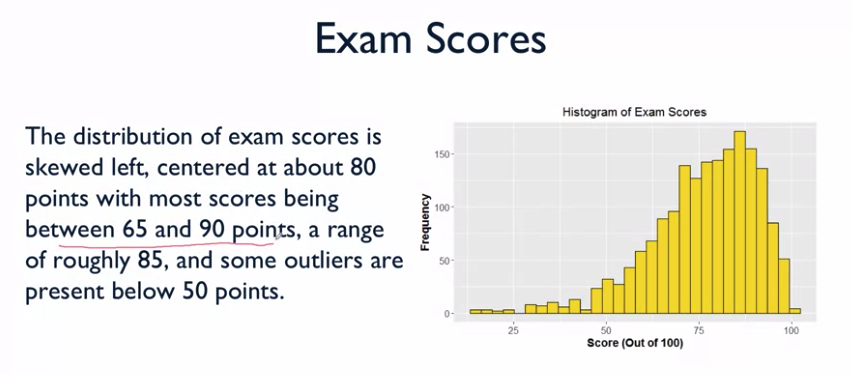

## References

[1] [Basic Statistics](https://www.spcforexcel.com/knowledge/basic-statistics/are-skewness-and-kurtosis-useful-statistics)  
[2] [Data Science Guide](https://datascienceguide.github.io)   
[3] [Foundations of Data Analytics](https://uidfcba.github.io/570a/) by Professor Robert J. Brunner at the University of Illinois  
